In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
filepath_df = r"./HospitalAdmissionsData.csv";
df = pd.read_csv(filepath_df)

In [11]:
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [17]:
'''
The output above shows that there is 1 float feature:
    AdmissionLengthDays
The output also shows that there are 4 integer features:
    ID, Death_1, EnglishLanguage_1, Married_1
'''

'\nThe output above shows that there is 1 float feature:\n    AdmissionLengthDays\nThe output also shows that there are 4 integer features:\n    ID, Death_1, EnglishLanguage_1, Married_1\n'

In [14]:
df.describe(include='object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


In [18]:
df.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [19]:
df.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [26]:
df.Admission_Type.mode()

0    emergency
dtype: object

In [22]:
df.Insurance_Type.mode()

0    medicare
dtype: object

In [23]:
df.Religion_Type.mode()

0    catholic
dtype: object

In [24]:
df.Race.mode()

0    white
dtype: object

In [25]:
df.Dx.mode()

0    newborn
dtype: object

Text(0, 0.5, 'Number of Visits')

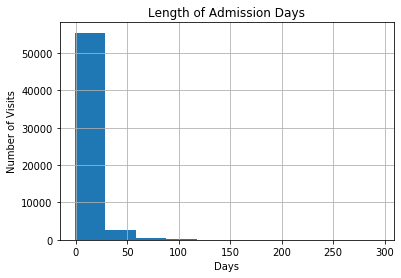

In [30]:
df.hist(column='AdmissionLengthDays')
plt.title('Length of Admission Days')
plt.xlabel('Days')
plt.ylabel('Number of Visits')

Text(0, 0.5, 'Number of Visits')

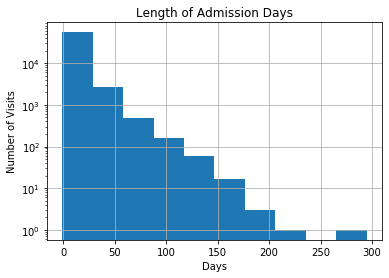

In [32]:
df.hist(column='AdmissionLengthDays')
plt.title('Length of Admission Days')
plt.xlabel('Days')
plt.yscale('log')
plt.ylabel('Number of Visits')

In [33]:
#When we use a log scale for the number of visits,
#we can see much more of a downward trend than the normal scale

In [47]:
hospbar = df.groupby('Death_1').mean()

Text(0.5, 0, 'Survival Status (1 = Died)')

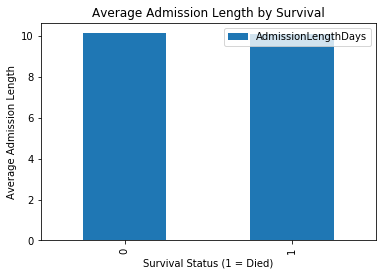

In [48]:
hospbar.plot.bar(y='AdmissionLengthDays')
plt.title('Average Admission Length by Survival')
plt.ylabel('Average Admission Length')
plt.xlabel('Survival Status (1 = Died)')

In [49]:
hospDeathInsurance = pd.crosstab(df.Death_1, df.Insurance_Type)
print(hospDeathInsurance)

Insurance_Type  government  medicaid  medicare  private  self pay
Death_1                                                          
0                     1691      5400     24253    21152       515
1                       90       381      3904     1382        95


In [50]:
from scipy import stats
chi= stats.chi2_contingency(hospDeathInsurance)
print(chi)

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))


In [ ]:
#The above chi test gives us a p-value of 0.0343 is less that 0.05
#we can reject the null hypothesis: no association between insurance/survival
#we can conclude that survival and insurance are related